In [107]:
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandasql import sqldf
import sklearn
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
from fcmeans import FCM
import pylab
import sklearn.mixture as mixture
import pyclustertend 
import random
print("EJERCICIO 1")
pd.set_option('display.max_columns', None)
movies = pd.read_csv('movies.csv', encoding='cp1252')
cualitativas = ['id', 'popularity', 'originalTitle', 'originalLanguage', 'title', 'homePage', 'video', 'releaseDate','genres', 'productionCompany', 'productionCompanyCountry', 'productionCountry','actors', 'director', 'actorsPopularity', 'actorsCharacter']
cualitativasEspeciales = ['genres', 'productionCompany', 'productionCompanyCountry', 'productionCountry', 'actors', 'director', 'actorsPopularity', 'actorsCharacter']
cuantitativas = ['budget', 'revenue', 'runtime', 'voteCount', 'castWomenAmount', 'voteAvg', 'castMenAmount']
cuantitativasEspeciales = ['actorsPopularity']
cuantitativasConErrores = ['castWomenAmount', 'castMenAmount']
cuantitativasNorm = ['budget', 'revenue', 'runtime', 'genresAmount', 'productionCoAmount', 'productionCountriesAmount', 'voteCount', 'voteAvg', 'actorsAmount','castWomenAmount', 'castMenAmount']

print('''Se utilizaran las variables cuantitativas normalizadas para la creación de los clusters, esto debido a que se requiere
de datos numericos para realizar los clusters''')
movies = movies.dropna()
movies['castMenAmount'] = movies['castMenAmount'].apply(lambda x: int(x) if str(x).isdigit() and int(x) < 500  else 0)
movies['castWomenAmount'] =  movies['castWomenAmount'].apply(lambda x: int(x) if str(x).isdigit() and int(x) < 500  else 0)
for col in cualitativasEspeciales:
    movies[col] =  movies[col].apply(lambda v: v.split('|')[0])
ord_enc = sklearn.preprocessing.OrdinalEncoder()
for col in cualitativas:
    nuevo = col+'_code'
    movies[nuevo] = ord_enc.fit_transform(movies[[col]])
for col in cualitativas:
    movies.pop(col)
movies


EJERCICIO 1
Se utilizaran las variables cuantitativas normalizadas para la creación de los clusters, esto debido a que se requiere
de datos numericos para realizar los clusters


,budget,revenue,runtime,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,id_code,popularity_code,originalTitle_code,originalLanguage_code,title_code,homePage_code,video_code,releaseDate_code,genres_code,productionCompany_code,productionCompanyCountry_code,productionCountry_code,actors_code,director_code,actorsPopularity_code,actorsCharacter_code
0,4000000,4257354.0,98,5.7,2077,2,2,1,25,15,9,0.0,1320.0,1267.0,5.0,996.0,2783.0,0.0,150.0,4.0,983.0,50.0,64.0,1744.0,82.0,933.0,2665.0
10,140000000,655011224.0,143,7.8,16927,3,2,1,71,7,39,1.0,3133.0,2195.0,5.0,2016.0,145.0,0.0,318.0,1.0,1620.0,50.0,64.0,847.0,702.0,1192.0,1216.0
11,30000000,180899265.0,111,8.0,14202,2,2,1,36,10,21,2.0,2350.0,1685.0,5.0,1460.0,1401.0,0.0,329.0,0.0,983.0,50.0,64.0,1792.0,1622.0,986.0,256.0
14,31500000,150000000.0,147,8.3,6301,2,2,1,37,4,29,3.0,2017.0,594.0,5.0,255.0,754.0,0.0,39.0,6.0,1565.0,50.0,64.0,1177.0,640.0,638.0,570.0
16,75000000,527068851.0,87,7.0,6576,3,6,1,19,8,10,4.0,3075.0,3117.0,5.0,3072.0,1675.0,0.0,546.0,2.0,38.0,0.0,64.0,378.0,497.0,592.0,1144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9955,250000,0.0,120,6.5,73,3,2,1,30,0,0,3502.0,3363.0,564.0,5.0,218.0,3084.0,0.0,2392.0,17.0,1596.0,33.0,43.0,1112.0,794.0,0.0,122.0
9968,0,0.0,99,7.8,22,2,1,1,8,2,2,3503.0,1909.0,1416.0,5.0,1170.0,3070.0,0.0,2394.0,13.0,1403.0,52.0,53.0,1304.0,1969.0,820.0,1981.0
9979,0,0.0,90,8.5,29,2,3,1,24,14,10,3504.0,838.0,493.0,5.0,142.0,2467.0,0.0,2397.0,11.0,658.0,50.0,64.0,27.0,1552.0,1526.0,2459.0
9982,0,0.0,103,8.4,802,1,3,2,37,8,29,3505.0,3374.0,1427.0,5.0,1183.0,2641.0,0.0,2418.0,5.0,1189.0,18.0,63.0,392.0,599.0,1162.0,2459.0


27


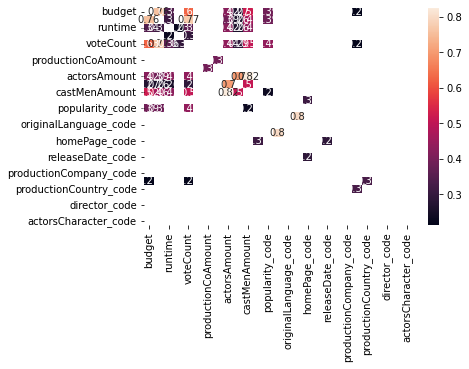

In [108]:
corrMatrix = movies.corr()
corrMatrix = corrMatrix[corrMatrix < 0.9]
corrMatrix = corrMatrix[corrMatrix > 0.2]
print(len(corrMatrix.columns))
sb.heatmap(corrMatrix, annot=True)
plt.show()

In [109]:
eliminar = ['productionCompany_code', 'productionCompanyCountry_code', 'productionCountry_code', 'title_code', 'homePage_code', 'video_code','originalTitle_code', 'id_code','genresAmount', 'productionCoAmount', 'productionCountriesAmount','originalLanguage_code', 'actors_code', 'director_code', 'actorsPopularity_code', 'actorsCharacter_code']
for col in eliminar:
    movies.pop(col)

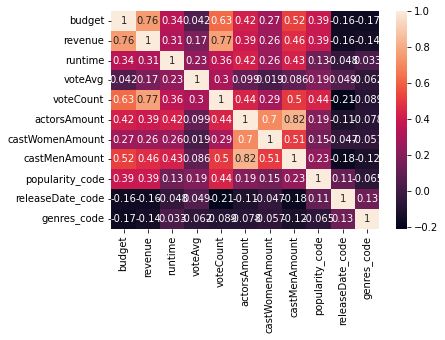

In [110]:
""" dicti = {}
movies.dropna()
for col in cuantitativas:
    dicti[col] = [movies[col].mean(), movies[col].std()]
print(dicti)
for col in cuantitativas:
    movies[col] = movies[col].apply(lambda x: (float(x)-dicti[col][0])/dicti[col][1]) """
""" corrMatrix = movies[cuantitativas].corr()
movies = movies[cuantitativas] """
corrMatrix = movies.corr()
sb.heatmap(corrMatrix, annot=True)
plt.show()    


In [124]:
movies

,budget,revenue,runtime,voteAvg,voteCount,actorsAmount,castWomenAmount,castMenAmount,popularity_code,releaseDate_code,genres_code
0,4000000,4257354.0,98,5.7,2077,25,15,9,1320.0,150.0,4.0
10,140000000,655011224.0,143,7.8,16927,71,7,39,3133.0,318.0,1.0
11,30000000,180899265.0,111,8.0,14202,36,10,21,2350.0,329.0,0.0
14,31500000,150000000.0,147,8.3,6301,37,4,29,2017.0,39.0,6.0
16,75000000,527068851.0,87,7.0,6576,19,8,10,3075.0,546.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
9955,250000,0.0,120,6.5,73,30,0,0,3363.0,2392.0,17.0
9968,0,0.0,99,7.8,22,8,2,2,1909.0,2394.0,13.0
9979,0,0.0,90,8.5,29,24,14,10,838.0,2397.0,11.0
9982,0,0.0,103,8.4,802,37,8,29,3374.0,2418.0,5.0


(3507, 11)
0.01976459830181433
0.011384709891082827
0.021460267609023583


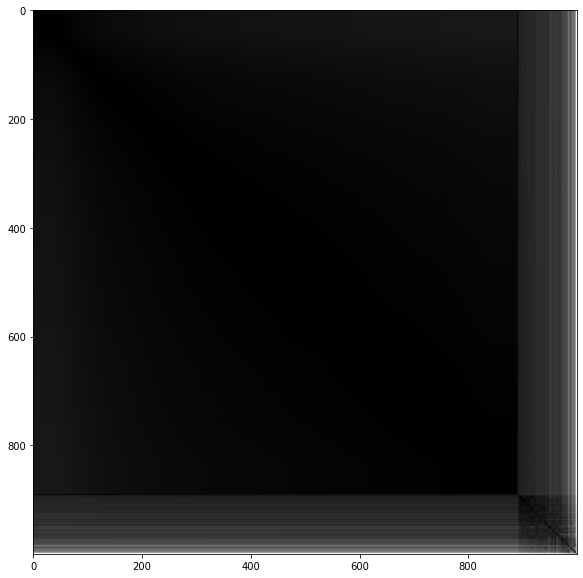

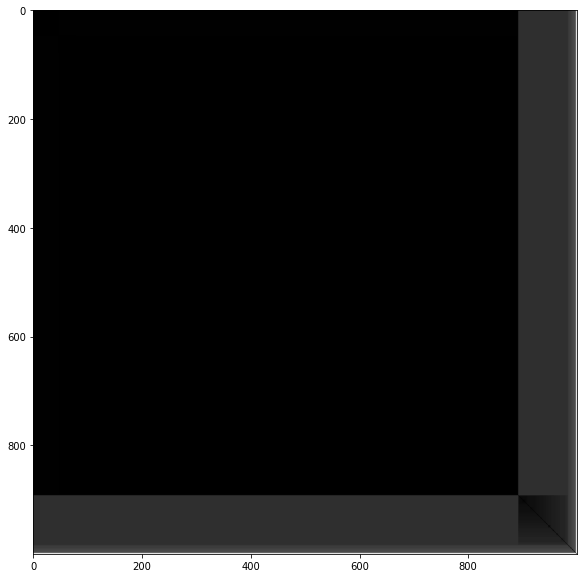

In [111]:
movies_array = movies.values
print(movies_array.shape)
#print(movies_array)
print(pyclustertend.hopkins(movies_array,len(movies_array)))
X = sklearn.preprocessing.normalize(movies_array)
#X = movies_array
X_scale=sklearn.preprocessing.scale(X)
#X_scale = X
print(pyclustertend.hopkins(X,len(X)))
print(pyclustertend.hopkins(X_scale,len(X_scale)))
pyclustertend.vat(X_scale[0:1000][:])
pyclustertend.ivat(X_scale[0:1000][:])

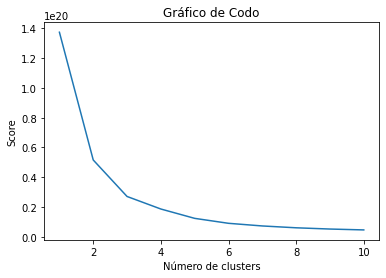

In [112]:
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(movies_array)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

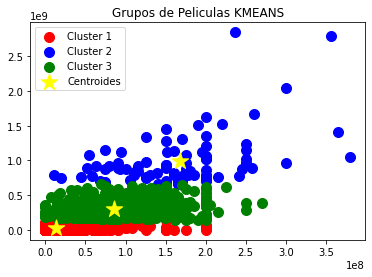

In [145]:
km = cluster.KMeans(n_clusters=3).fit(movies_array)
centroides = km.cluster_centers_
especies = km.predict(movies_array)
plt.scatter(movies_array[especies == 0, 0], movies_array[especies == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(movies_array[especies == 1, 0], movies_array[especies == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(movies_array[especies == 2, 0], movies_array[especies == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.title("Grupos de Peliculas KMEANS")
plt.legend()
plt.show()

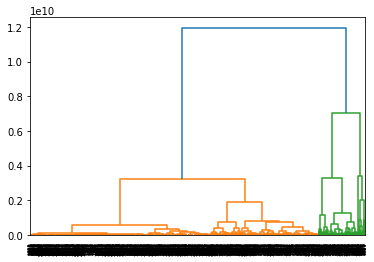

In [114]:
dendograma = sch.dendrogram(sch.linkage(movies_array[0:2500][:], method='ward'))

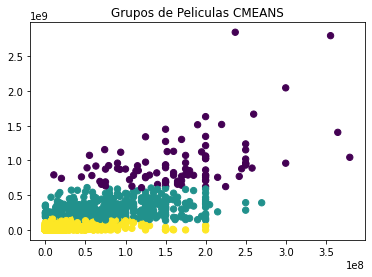

In [144]:
fcm = FCM(n_clusters=3)
fcm.fit(movies_array)
fcm_centers = fcm.centers
fcm_labels = fcm.predict(movies_array)
plt.scatter(movies_array[:, 0], movies_array[:, 1], c=fcm_labels, s=40,cmap="viridis")
plt.title("Grupos de Peliculas CMEANS")
plt.show()

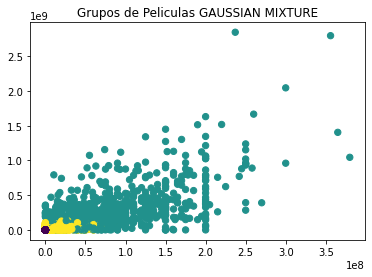

In [116]:
gmm = mixture.GaussianMixture(n_components = 3).fit(movies_array)
labels = gmm.predict(movies_array)
plt.scatter(movies_array[:, 0], movies_array[:, 1], c=labels, s=40,cmap="viridis")
plt.title("Grupos de Peliculas GAUSSIAN MIXTURE")
plt.show()

In [117]:
score = metrics.silhouette_score(movies_array, fcm_labels, metric='euclidean')
print('Silhouetter Score CMEANS: %.3f' % score)
score = metrics.silhouette_score(movies_array, km.labels_, metric='euclidean')
print('Silhouetter Score KMEANS: %.3f' % score)
score = metrics.silhouette_score(movies_array, labels, metric='euclidean')
print('Silhouetter Score GAUSSIAN MIXTURE: %.3f' % score)
aglo = cluster.AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
aglo_labels = aglo.fit_predict(movies_array)
score = metrics.silhouette_score(movies_array, aglo_labels, metric='euclidean')
print('Silhouetter Score Hierarchical cluestering MIXTURE: %.3f' % score)

Silhouetter Score CMEANS: 0.757
Silhouetter Score KMEANS: 0.764
Silhouetter Score GAUSSIAN MIXTURE: 0.117
Silhouetter Score Hierarchical cluestering MIXTURE: 0.777


For n_clusters = 2 The average silhouette_score is : 0.8382685836924115
For n_clusters = 3 The average silhouette_score is : 0.7639239849301871
For n_clusters = 4 The average silhouette_score is : 0.7496295350344117


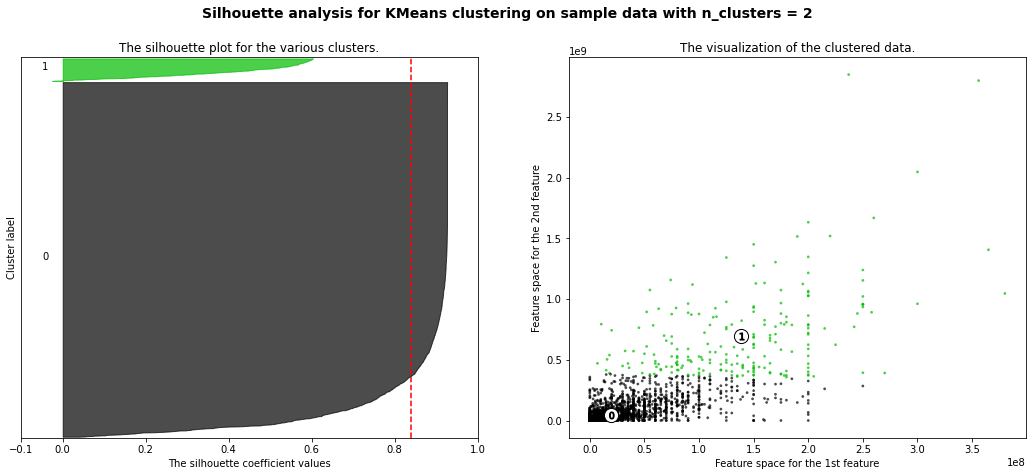

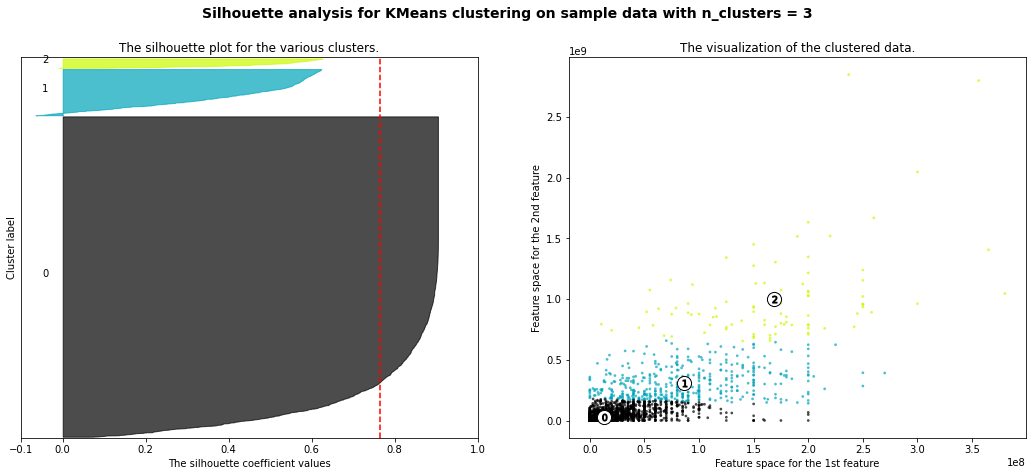

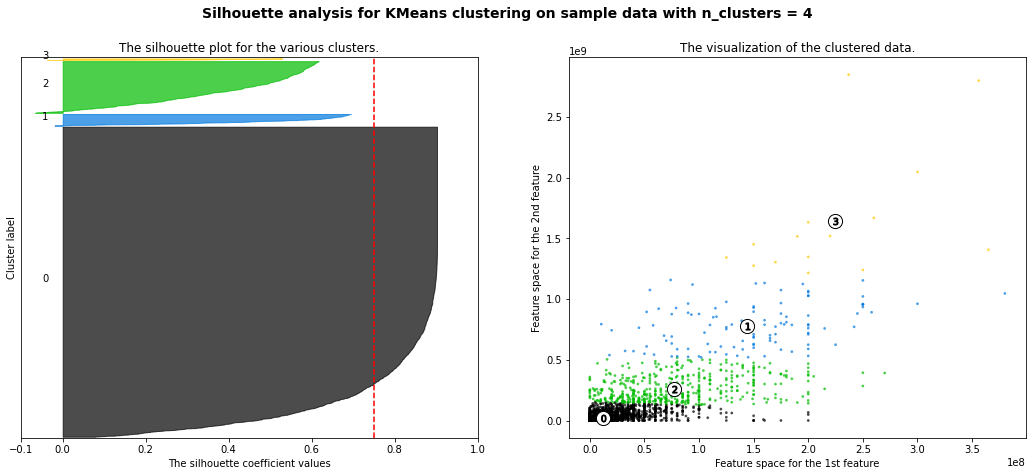

In [118]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# X, y = make_blobs(
#     n_samples=500,
#     n_features=2,
#     centers=4,
#     cluster_std=1,
#     center_box=(-10.0, 10.0),
#     shuffle=True,
#     random_state=1,
# )  # For reproducibility

range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(movies_array) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(movies_array)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(movies_array, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(movies_array, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        movies_array[:, 0], movies_array[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.820602287961359
For n_clusters = 3 The average silhouette_score is : 0.7772671995350344
For n_clusters = 4 The average silhouette_score is : 0.5832842077962291


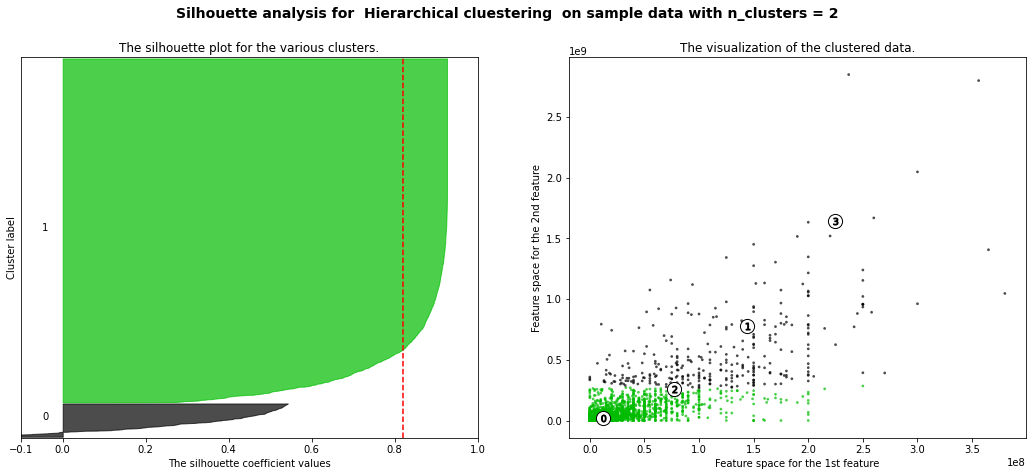

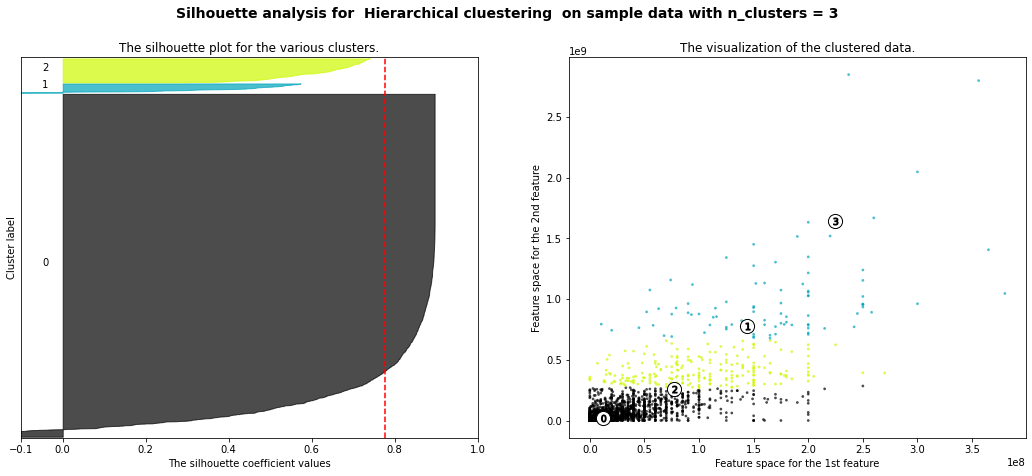

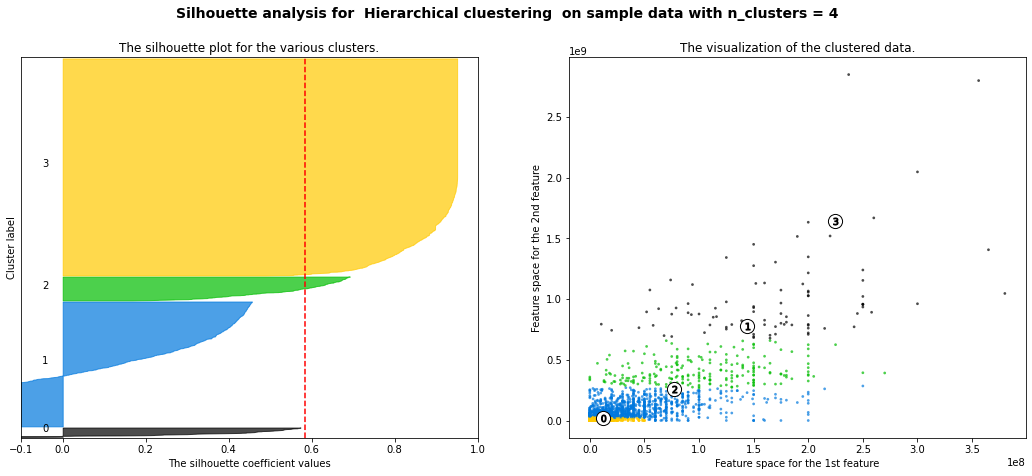

In [119]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# X, y = make_blobs(
#     n_samples=500,
#     n_features=2,
#     centers=4,
#     cluster_std=1,
#     center_box=(-10.0, 10.0),
#     shuffle=True,
#     random_state=1,
# )  # For reproducibility

range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(movies_array) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = cluster.AgglomerativeClustering(n_clusters=n_clusters,affinity='euclidean',linkage='ward')
    cluster_labels = clusterer.fit_predict(movies_array)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(movies_array, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(movies_array, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        movies_array[:, 0], movies_array[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    #centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for  Hierarchical cluestering  on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.8309397603277702
For n_clusters = 3 The average silhouette_score is : 0.7565259870328916
For n_clusters = 4 The average silhouette_score is : 0.7021952795069208


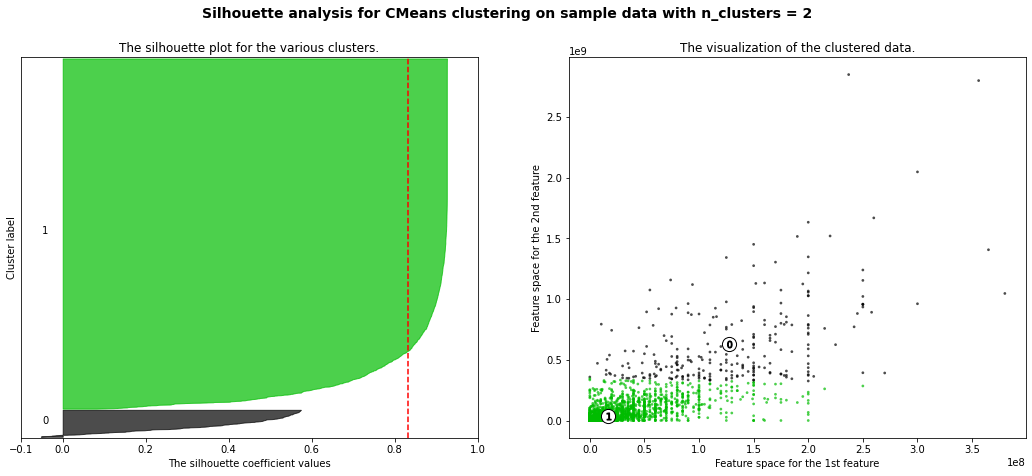

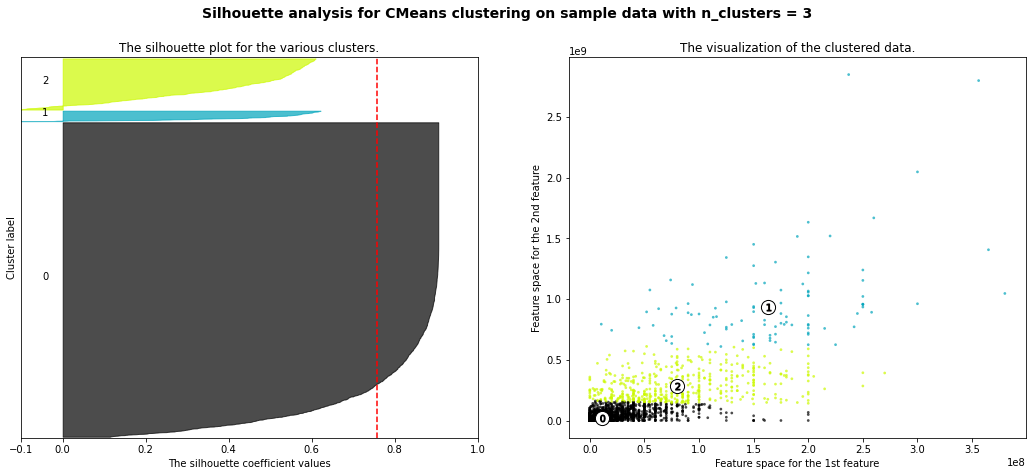

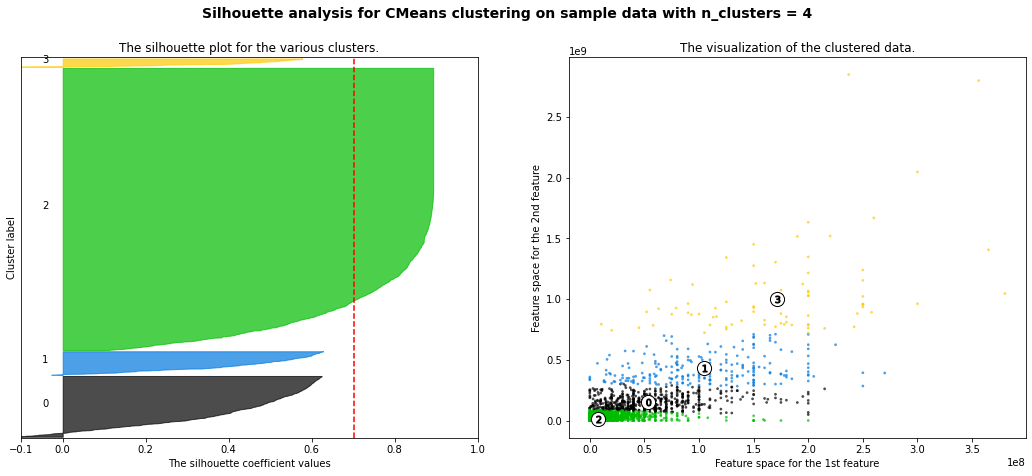

In [120]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# X, y = make_blobs(
#     n_samples=500,
#     n_features=2,
#     centers=4,
#     cluster_std=1,
#     center_box=(-10.0, 10.0),
#     shuffle=True,
#     random_state=1,
# )  # For reproducibility

range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(movies_array) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = FCM(n_clusters=n_clusters)
    clusterer.fit(movies_array)
    cluster_labels = clusterer.predict(movies_array)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(movies_array, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(movies_array, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        movies_array[:, 0], movies_array[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.centers
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for CMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

For n_clusters = 2 The average silhouette_score is : -0.01588520035168631
For n_clusters = 3 The average silhouette_score is : 0.11708359972029543
For n_clusters = 4 The average silhouette_score is : 0.12423446288750768


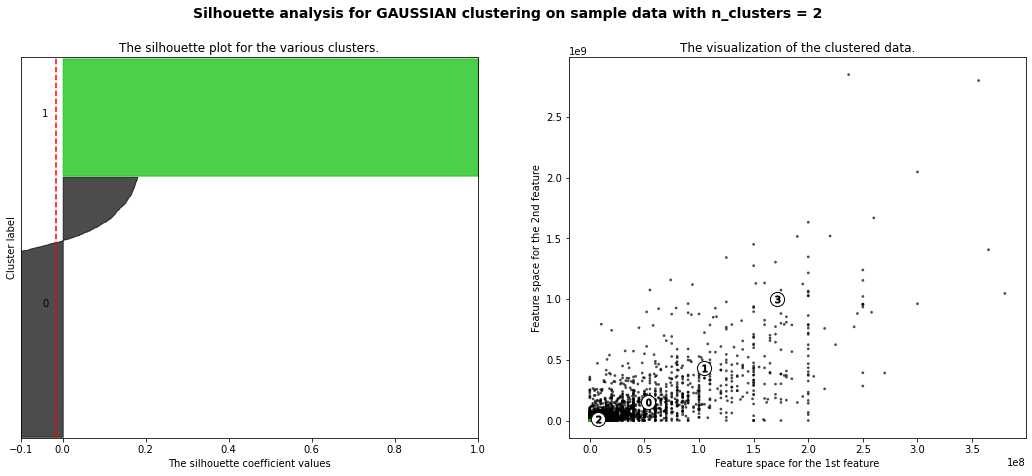

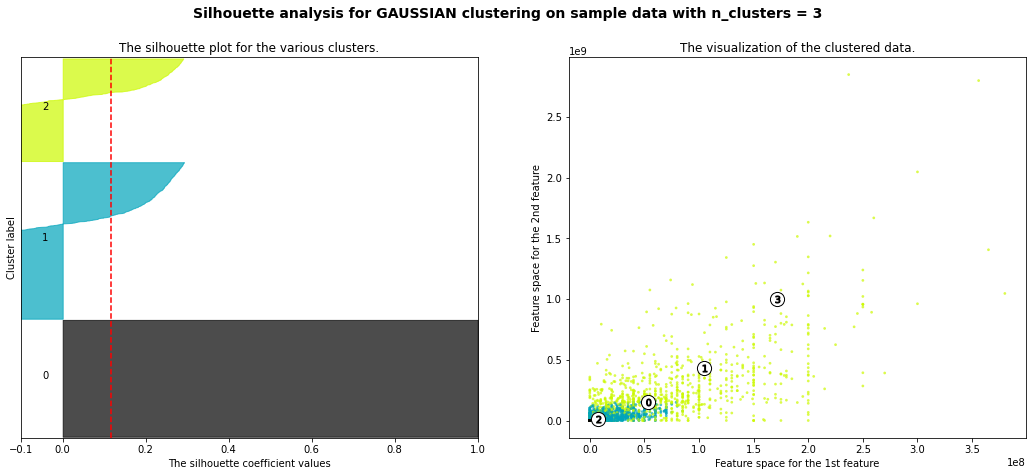

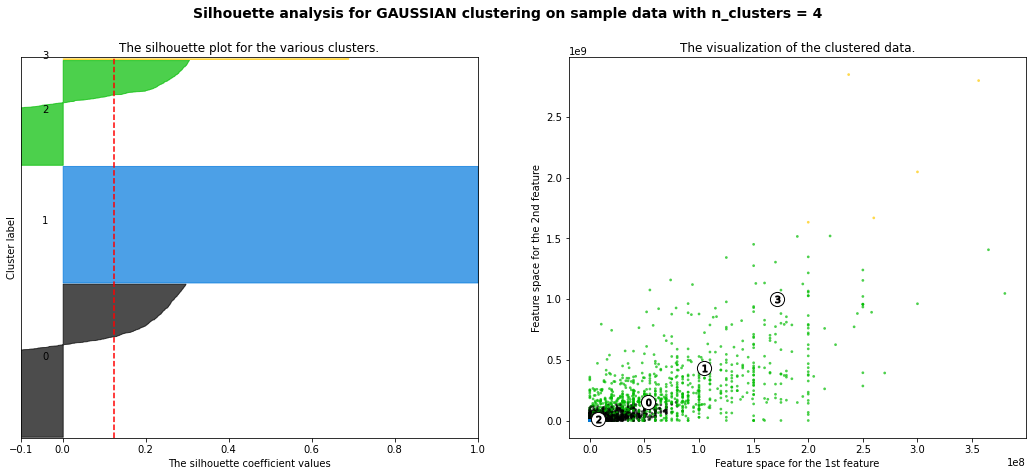

In [121]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# X, y = make_blobs(
#     n_samples=500,
#     n_features=2,
#     centers=4,
#     cluster_std=1,
#     center_box=(-10.0, 10.0),
#     shuffle=True,
#     random_state=1,
# )  # For reproducibility

range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(movies_array) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = mixture.GaussianMixture(n_components=n_clusters).fit(movies_array)
    cluster_labels = clusterer.fit_predict(movies_array)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(movies_array, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(movies_array, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        movies_array[:, 0], movies_array[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    # centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for GAUSSIAN clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [141]:
# Confusion Matrix Gaussian Mixture
from sklearn.metrics import confusion_matrix
confusion_matrix(labels, movies["genres_code"])

array([[114,  22, 187, 144,  33,  74, 176,  49,  22,   5,  66,  17,   9,
         61,  39,  11,  51,   7,   3],
       [192, 120,  59, 135,  37,   1, 167,  38,  34,   3,  43,   6,   9,
         17,  44,   0,  34,  14,   4],
       [192,  80,  81, 227,  68,  19, 344,  46,  37,   4, 148,  16,  15,
         37,  46,   0,  80,  11,   9],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0

In [137]:
# Confusion Matrix CMEANS
from sklearn.metrics import confusion_matrix
confusion_matrix(fcm_labels, movies["genres_code"])

array([[114,  58,  39,  75,  17,   0,  65,  19,  18,   1,  15,   4,   4,
          6,  19,   0,  16,   6,   1],
       [351, 129, 282, 431, 120,  94, 621, 107,  70,  11, 242,  34,  29,
        109, 102,  11, 148,  26,  15],
       [ 33,  35,   6,   0,   1,   0,   1,   7,   5,   0,   0,   1,   0,
          0,   8,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0

In [138]:
# Confusion Matrix KMEANS
from sklearn.metrics import confusion_matrix
confusion_matrix(km.labels_, movies["genres_code"])

array([[109,  55,  38,  69,  10,   0,  56,  17,  16,   1,  13,   3,   3,
          5,  18,   0,  13,   5,   1],
       [359, 134, 285, 437, 127,  94, 631, 109,  73,  11, 244,  35,  30,
        110, 103,  11, 151,  27,  15],
       [ 30,  33,   4,   0,   1,   0,   0,   7,   4,   0,   0,   1,   0,
          0,   8,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0

In [139]:
# Confusion Matrix Hierarchical
from sklearn.metrics import confusion_matrix
confusion_matrix(aglo_labels, movies["genres_code"])

array([[404, 157, 300, 485, 132,  94, 662, 116,  82,  11, 252,  37,  32,
        112, 111,  11, 156,  28,  15],
       [ 30,  31,   4,   0,   1,   0,   0,   7,   4,   0,   0,   1,   0,
          0,   8,   0,   1,   0,   0],
       [ 64,  34,  23,  21,   5,   0,  25,  10,   7,   1,   5,   1,   1,
          3,  10,   0,   8,   4,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0